In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 38.7MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [11]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [12]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [13]:
data_f = data2.loc[data2.team1.isin(['Mumbai Indians','Royal Challengers Bangalore'])] 
data_f = data_f.loc[data_f.team2.isin(['Mumbai Indians','Royal Challengers Bangalore'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
36,37,2017,Mumbai,2017-05-01,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium,AK Chaudhary,CB Gaffaney,NaN
62,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
89,90,2008,Bangalore,2008-05-28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,CRD Fernando,M Chinnaswamy Stadium,BF Bowden,AV Jayaprakash,NaN
142,143,2009,Johannesburg,2009-05-03,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,9,JH Kallis,New Wanderers Stadium,RE Koertzen,TH Wijewardene,NaN
152,153,2009,Port Elizabeth,2009-05-10,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,16,0,JP Duminy,St George's Park,BR Doctrove,BG Jerling,NaN
187,188,2010,Mumbai,2010-03-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,7,JH Kallis,Brabourne Stadium,HDPK Dharmasena,SS Hazare,NaN
225,226,2010,Bangalore,2010-04-17,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,57,0,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN
230,231,2010,Mumbai,2010-04-21,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,35,0,KA Pollard,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,NaN
241,242,2011,Bangalore,2011-04-12,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,SR Tendulkar,M Chinnaswamy Stadium,HDPK Dharmasena,AL Hill,NaN


Finally , We have got a complete dataset for all the matches of MI VS RCB

**Let's do Q1 now**

MI Wins - 16
RCB Wins - 9


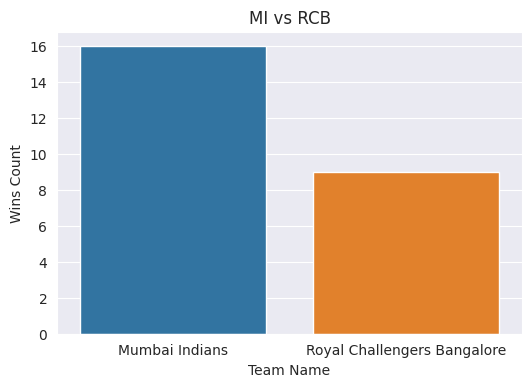

In [14]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs RCB')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('RCB Wins -',B)

plt.show()


Let's mark MI without any doubt

**Let's do Q2 now**

**Let's find bowlers with more than 2 wickets**

In [91]:
data_n = data.loc[data.bowling_team.isin(['Mumbai Indians','Royal Challengers Bangalore'])]
data_n = data_n.loc[data.batting_team.isin(['Mumbai Indians','Royal Challengers Bangalore'])]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2589,12,1,Royal Challengers Bangalore,Mumbai Indians,1,1,CH Gayle,V Kohli,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2592,12,1,Royal Challengers Bangalore,Mumbai Indians,1,4,CH Gayle,V Kohli,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172278,11322,2,Mumbai Indians,Royal Challengers Bangalore,19,3,HH Pandya,KA Pollard,P Negi,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
172279,11322,2,Mumbai Indians,Royal Challengers Bangalore,19,4,HH Pandya,KA Pollard,P Negi,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
172280,11322,2,Mumbai Indians,Royal Challengers Bangalore,19,5,HH Pandya,KA Pollard,P Negi,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
172281,11322,2,Mumbai Indians,Royal Challengers Bangalore,19,6,HH Pandya,KA Pollard,P Negi,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN


In [19]:
data_wt= data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.player_dismissed.value_counts().sum())).reset_index(name='No of Dismissal')
data_wt

,match_id,bowler,No of Dismissal
0,12,HH Pandya,1
1,12,Harbhajan Singh,0
2,12,JJ Bumrah,1
3,12,KH Pandya,1
4,12,MJ McClenaghan,2
...,...,...,...
286,11322,P Negi,0
287,11322,RD Chahar,0
288,11322,SL Malinga,5
289,11322,UT Yadav,0


Here, we have got wickets taken by all the bowlers in a particular match

In [25]:
data_wt= data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.player_dismissed.value_counts().sum()>=2)).reset_index(name='No of Dismissal')
data_wt

,match_id,bowler,No of Dismissal
0,12,HH Pandya,False
1,12,Harbhajan Singh,False
2,12,JJ Bumrah,False
3,12,KH Pandya,False
4,12,MJ McClenaghan,True
...,...,...,...
286,11322,P Negi,False
287,11322,RD Chahar,False
288,11322,SL Malinga,True
289,11322,UT Yadav,False


True represents whether a bowler has taken 2 or more wickets.

False represents he hasn't done above.

Let's count there values to get to our results.

In [26]:
data_wt['No of Dismissal'].value_counts()

False    214
True      77
Name: No of Dismissal, dtype: int64

In [27]:
data_wt.match_id.nunique()

25

In [28]:
np.round(77/25,2) # Averge 2+ wickets taken in RCB v MI contest

3.08

Let's mark 3-4 considering our analysis.

**For Q3, Let's find economy rate of all**



In [30]:
data_er = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.total_runs.sum())).reset_index(name='Runs_Given')
data_er

,match_id,bowler,Runs_Given
0,12,HH Pandya,9
1,12,Harbhajan Singh,25
2,12,JJ Bumrah,40
3,12,KH Pandya,25
4,12,MJ McClenaghan,20
...,...,...,...
286,11322,P Negi,50
287,11322,RD Chahar,31
288,11322,SL Malinga,35
289,11322,UT Yadav,26


In [33]:
data_er2 = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_bowled')
data_er2

,match_id,bowler,Balls_bowled
0,12,HH Pandya,12
1,12,Harbhajan Singh,24
2,12,JJ Bumrah,25
3,12,KH Pandya,24
4,12,MJ McClenaghan,25
...,...,...,...
286,11322,P Negi,27
287,11322,RD Chahar,24
288,11322,SL Malinga,24
289,11322,UT Yadav,13


In [49]:
data_er2['Overs_bowled'] = data_er2['Balls_bowled'] / 6
data_er2

,match_id,bowler,Balls_bowled,Overs_bowled
0,12,HH Pandya,12,2.000000
1,12,Harbhajan Singh,24,4.000000
2,12,JJ Bumrah,25,4.166667
3,12,KH Pandya,24,4.000000
4,12,MJ McClenaghan,25,4.166667
...,...,...,...,...
286,11322,P Negi,27,4.500000
287,11322,RD Chahar,24,4.000000
288,11322,SL Malinga,24,4.000000
289,11322,UT Yadav,13,2.166667


First let's join them . Also, I think it will better to do find Economy rate with Ballsr rather than Overs because of any error

In [66]:
data_e = data_er.join(data_er2['Balls_bowled'])
data_e 


,match_id,bowler,Runs_Given,Balls_bowled
0,12,HH Pandya,9,12
1,12,Harbhajan Singh,25,24
2,12,JJ Bumrah,40,25
3,12,KH Pandya,25,24
4,12,MJ McClenaghan,20,25
...,...,...,...,...
286,11322,P Negi,50,27
287,11322,RD Chahar,31,24
288,11322,SL Malinga,35,24
289,11322,UT Yadav,26,13


Let's find economy rate now

Formulae - Runs/Balls * 6

In [67]:
data_e['Economy_rate'] =( data_e['Runs_Given'] / data_e['Balls_bowled']) * 6
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Economy_rate
0,12,HH Pandya,9,12,4.500000
1,12,Harbhajan Singh,25,24,6.250000
2,12,JJ Bumrah,40,25,9.600000
3,12,KH Pandya,25,24,6.250000
4,12,MJ McClenaghan,20,25,4.800000
...,...,...,...,...,...
286,11322,P Negi,50,27,11.111111
287,11322,RD Chahar,31,24,7.750000
288,11322,SL Malinga,35,24,8.750000
289,11322,UT Yadav,26,13,12.000000


Since we have the condition of 1 over max , let's filter it out.

Also, then we will find all those who have economy rate less than 8


In [69]:
data_e = data_e[data_e.Balls_bowled >6] # Max 1 over condition

In [70]:
data_e = data_e[data_e.Economy_rate < 8] # Economy rate should be less than 8

In [71]:
data_e.head()

,match_id,bowler,Runs_Given,Balls_bowled,Economy_rate
0,12,HH Pandya,9,12,4.50
1,12,Harbhajan Singh,25,24,6.25
3,12,KH Pandya,25,24,6.25
4,12,MJ McClenaghan,20,25,4.80
6,12,S Aravind,21,25,5.04


In [73]:
data_e.Economy_rate.value_counts().sum() # No of bowlers with less than economy rate of 8 in MI v RCB contest

131

In [74]:
data_e.match_id.nunique()

25

In [75]:
np.round(131/25,2) # Average bowler per match with Economy of less than 8

5.24

Let's mark 5-7 bowlers considering our analysis

**Let's do Q4**

**Let's find Strike rate for all**

In [76]:
data_sr = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.batsman_runs.sum())).reset_index(name='Runs_Scored')
data_sr

,match_id,batsman,Runs_Scored
0,12,AB de Villiers,19
1,12,CH Gayle,22
2,12,HH Pandya,9
3,12,JC Buttler,2
4,12,KA Pollard,70
...,...,...,...
360,11322,PA Patel,31
361,11322,Q de Kock,41
362,11322,RG Sharma,29
363,11322,UT Yadav,2


In [77]:
data_sr2 = data_n.groupby(['match_id','batsman']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_Faced')
data_sr2

,match_id,batsman,Balls_Faced
0,12,AB de Villiers,22
1,12,CH Gayle,28
2,12,HH Pandya,5
3,12,JC Buttler,5
4,12,KA Pollard,49
...,...,...,...
360,11322,PA Patel,20
361,11322,Q de Kock,27
362,11322,RG Sharma,20
363,11322,UT Yadav,1


In [102]:
data_s = data_sr.join(data_sr2['Balls_Faced'])
data_s

,match_id,batsman,Runs_Scored,Balls_Faced
0,12,AB de Villiers,19,22
1,12,CH Gayle,22,28
2,12,HH Pandya,9,5
3,12,JC Buttler,2,5
4,12,KA Pollard,70,49
...,...,...,...,...
360,11322,PA Patel,31,20
361,11322,Q de Kock,41,27
362,11322,RG Sharma,29,20
363,11322,UT Yadav,2,1


In [104]:
data_s['Strike_Rate'] = (data_s['Runs_Scored']/data_s['Balls_Faced']) * 100
data_s

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
0,12,AB de Villiers,19,22,86.363636
1,12,CH Gayle,22,28,78.571429
2,12,HH Pandya,9,5,180.000000
3,12,JC Buttler,2,5,40.000000
4,12,KA Pollard,70,49,142.857143
...,...,...,...,...,...
360,11322,PA Patel,31,20,155.000000
361,11322,Q de Kock,41,27,151.851852
362,11322,RG Sharma,29,20,145.000000
363,11322,UT Yadav,2,1,200.000000


Now, We have a condition of more than 3 boundaries. To score atleast 4 boundaries one needs to score 16 runs. 

Let's filter out it with this condition

In [106]:
data_s = data_s[data_s.Runs_Scored > 16 ] # Max 16 runs to score 4 boundaries

In [105]:
data_s = data_s[data_s.Strike_Rate > 130 ] # Max Strike Rate of 130 Condition

In [107]:
data_s.head()

,match_id,batsman,Runs_Scored,Balls_Faced,Strike_Rate
4,12,KA Pollard,70,49,142.857143
15,37,AB de Villiers,43,28,153.571429
18,37,JC Buttler,33,21,157.142857
19,37,KA Pollard,17,13,130.769231
23,37,Mandeep Singh,17,13,130.769231


In [108]:
data_s.batsman.value_counts().sum()

93

In [109]:
data_s.match_id.nunique()

23

In [110]:
np.round(93/23,2) # Average players to score with SR of 130 and hit more than 3 boundaries in MI v RCB contest

4.04

Let's mark 3-5 considering our analysis

**Let's do Q5 now**

**Let's find difference of powerplay runs**

In [112]:
data_mi = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore'])]
data_mi = data_mi.loc[data.batting_team.isin(['Mumbai Indians'])]
data_mi = data_mi.loc[data_mi.over <=6]

In [113]:
data_mi.total_runs.sum()

1125

In [115]:
np.round(1125/25,2) # Average Powerplay runs of MI v RCB

45.0

In [116]:
data_rcb = data.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_rcb = data_rcb.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_rcb = data_rcb.loc[data_rcb.over <=6]

In [117]:
data_rcb.total_runs.sum()

1076

In [119]:
np.round(1076/25,2) # Average Powerplay runs of RCB v MI

43.04

Well let's mark 0-5 considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

